In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Krishna Dhimal',
 'Malkit Gasi',
 'Aashish Bamanu',
 'Shamar Uprety',
 'Nirajan Katwal',
 'Ananta Chouhan',
 'Binod Pokhael',
 'Pramod Hayu',
 'Kush Harijan',
 'Prasad Siddiqui']

In [7]:
total_customer = 200000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [12]:
df.gender.value_counts()

Male                 104479
Female                74434
Other                 13795
Prefer not to say      7292
Name: gender, dtype: int64

In [13]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [15]:
df['email'] = df.name.apply(email_gen)

In [16]:
df

,name,gender,email
0,Kiran Chauhan,Male,kiran.chauhan@fakeemail.com
1,Bibhas Chapai,Male,bibhas.chapai@fakeemail.com
2,Aashish Angbuhang,Male,aashish.angbuhang@fakeemail.com
3,Saroj vatsa Aidee,Male,saroj.vatsa@fakeemail.com
4,Rajesh Upeti,Male,rajesh.upeti@fakeemail.com
...,...,...,...
83995,Manu Mahto,Female,manu.mahto@fakeemail.com
83996,Alina Sharan,Female,alina.sharan@fakeemail.com
83997,Reshma Bhochhiboya,Female,reshma.bhochhiboya@fakeemail.com
83998,Shambhav Baisyet,Female,shambhav.baisyet@fakeemail.com


In [17]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [18]:
df

,name,gender,email,phone
0,Kiran Chauhan,Male,kiran.chauhan@fakeemail.com,9841586737
1,Bibhas Chapai,Male,bibhas.chapai@fakeemail.com,9841702210
2,Aashish Angbuhang,Male,aashish.angbuhang@fakeemail.com,9841465601
3,Saroj vatsa Aidee,Male,saroj.vatsa@fakeemail.com,9841250854
4,Rajesh Upeti,Male,rajesh.upeti@fakeemail.com,9841355099
...,...,...,...,...
83995,Manu Mahto,Female,manu.mahto@fakeemail.com,9841624235
83996,Alina Sharan,Female,alina.sharan@fakeemail.com,9841926831
83997,Reshma Bhochhiboya,Female,reshma.bhochhiboya@fakeemail.com,9841671996
83998,Shambhav Baisyet,Female,shambhav.baisyet@fakeemail.com,9841865138


In [19]:
df['channel'] = 'Word of Mouth'

In [20]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [21]:
df

,name,gender,email,phone,channel
0,Kiran Chauhan,Male,kiran.chauhan@fakeemail.com,9841586737,Word of Mouth
1,Bibhas Chapai,Male,bibhas.chapai@fakeemail.com,9841702210,Other
2,Aashish Angbuhang,Male,aashish.angbuhang@fakeemail.com,9841465601,Facebook/Ads
3,Saroj vatsa Aidee,Male,saroj.vatsa@fakeemail.com,9841250854,Facebook/Ads
4,Rajesh Upeti,Male,rajesh.upeti@fakeemail.com,9841355099,Word of Mouth
...,...,...,...,...,...
83995,Manu Mahto,Female,manu.mahto@fakeemail.com,9841624235,Google Search
83996,Alina Sharan,Female,alina.sharan@fakeemail.com,9841926831,Facebook/Ads
83997,Reshma Bhochhiboya,Female,reshma.bhochhiboya@fakeemail.com,9841671996,Google Search
83998,Shambhav Baisyet,Female,shambhav.baisyet@fakeemail.com,9841865138,Facebook/Ads


In [24]:
df.channel.value_counts()

Facebook/Ads     76873
Google Search    54836
Other            35014
Word of Mouth    33277
Name: channel, dtype: int64

In [25]:
df['first_contact'] = 'app'

In [26]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [27]:
df

,name,gender,email,phone,channel,first_contact
0,Kiran Chauhan,Male,kiran.chauhan@fakeemail.com,9841586737,Word of Mouth,browser
1,Bibhas Chapai,Male,bibhas.chapai@fakeemail.com,9841702210,Other,browser
2,Aashish Angbuhang,Male,aashish.angbuhang@fakeemail.com,9841465601,Facebook/Ads,browser
3,Saroj vatsa Aidee,Male,saroj.vatsa@fakeemail.com,9841250854,Facebook/Ads,browser
4,Rajesh Upeti,Male,rajesh.upeti@fakeemail.com,9841355099,Word of Mouth,browser
...,...,...,...,...,...,...
83995,Manu Mahto,Female,manu.mahto@fakeemail.com,9841624235,Google Search,browser
83996,Alina Sharan,Female,alina.sharan@fakeemail.com,9841926831,Facebook/Ads,app
83997,Reshma Bhochhiboya,Female,reshma.bhochhiboya@fakeemail.com,9841671996,Google Search,browser
83998,Shambhav Baisyet,Female,shambhav.baisyet@fakeemail.com,9841865138,Facebook/Ads,browser


In [28]:
df['first_contact'].value_counts()

browser    172020
app         27980
Name: first_contact, dtype: int64

In [29]:
df = df.sample(frac=1)

In [30]:
df

,name,gender,email,phone,channel,first_contact
27922,Santoshi Pujari,Other,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser
51390,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser
34938,Jenis Dong,Male,jenis.dong@fakeemail.com,9841982134,Other,browser
26083,Prapti Lingden,Female,prapti.lingden@fakeemail.com,9841648216,Other,browser
80941,Srijan Biswash,Male,srijan.biswash@fakeemail.com,9841587182,Other,browser
...,...,...,...,...,...,...
30350,Milan Foyal,Male,milan.foyal@fakeemail.com,9841380399,Google Search,browser
71130,Karuna Ganawali,Female,karuna.ganawali@fakeemail.com,9841059703,Facebook/Ads,browser
48138,Saroj vatsa Khadayat,Male,saroj.vatsa@fakeemail.com,9841356974,Google Search,browser
69110,Paulo Khandlwal,Male,paulo.khandlwal@fakeemail.com,9841727368,Google Search,app


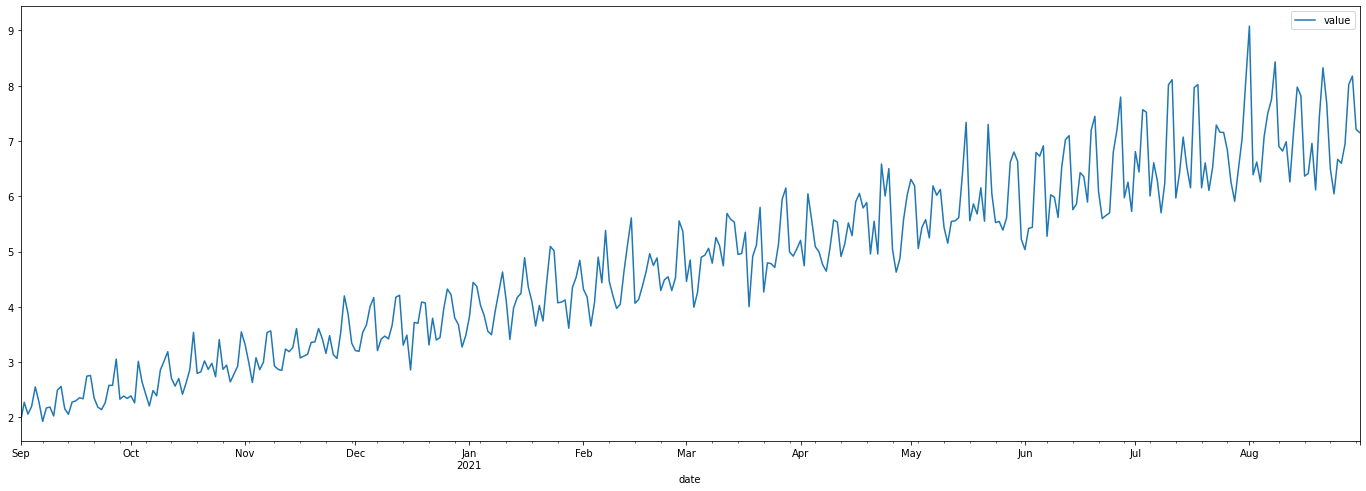

In [31]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [32]:
data = g.generate()

In [33]:
data['rows'] = (100*data.value).astype(int)

In [34]:
data.rows.sum()

175646

In [35]:
data

,date,base_amount,my_linear_trend,white_noise,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,2.000000,0.993400,1.0,1.986800,1.986800,198
1,2020-09-02,1.0,2.013699,0.948480,1.0,1.909953,1.909953,190
2,2020-09-03,1.0,2.027397,0.940699,1.0,1.907171,1.907171,190
3,2020-09-04,1.0,2.041096,0.957063,1.1,2.148803,2.148803,214
4,2020-09-05,1.0,2.054795,0.997041,1.2,2.458458,2.458458,245
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,6.931507,1.019808,1.1,7.775690,7.775690,777
361,2021-08-28,1.0,6.945205,1.034782,1.2,8.624126,8.624126,862
362,2021-08-29,1.0,6.958904,0.920577,1.2,7.687447,7.687447,768
363,2021-08-30,1.0,6.972603,0.938352,1.0,6.542754,6.542754,654


In [ ]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [37]:
final_dates = (data.apply(create_list, axis=1).sum())

In [38]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [39]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_9296/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [40]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Santoshi Pujari,Other,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,2020-09-01 00:00:00
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,2020-09-01 00:00:00
2,Jenis Dong,Male,jenis.dong@fakeemail.com,9841982134,Other,browser,2020-09-01 00:00:00
3,Prapti Lingden,Female,prapti.lingden@fakeemail.com,9841648216,Other,browser,2020-09-01 00:00:00
4,Srijan Biswash,Male,srijan.biswash@fakeemail.com,9841587182,Other,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
175641,Vivi Nandana,Female,vivi.nandana@fakeemail.com,9841920492,Facebook/Ads,app,2021-08-31 00:00:00
175642,Sunita Dhawal,Female,sunita.dhawal@fakeemail.com,9841705164,Word of Mouth,browser,2021-08-31 00:00:00
175643,Asutosh Ranzitkar,Male,asutosh.ranzitkar@fakeemail.com,9841185822,Other,app,2021-08-31 00:00:00
175644,Alina Tuldhar,Female,alina.tuldhar@fakeemail.com,9841091936,Word of Mouth,browser,2021-08-31 00:00:00


In [41]:
clients.gender.value_counts()

Male                 91766
Female               65366
Other                12140
Prefer not to say     6374
Name: gender, dtype: int64

In [42]:
clients.channel.value_counts()

Facebook/Ads     67624
Google Search    48045
Other            30818
Word of Mouth    29159
Name: channel, dtype: int64

In [43]:
clients['first_contact'].value_counts()

browser    151135
app         24511
Name: first_contact, dtype: int64

In [44]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [45]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_9296/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [46]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_9296/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [47]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Santoshi Pujari,Other,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,2020-09-01 19:11:43.636755,100000000
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,2020-09-01 17:54:27.179981,100000001
2,Jenis Dong,Male,jenis.dong@fakeemail.com,9841982134,Other,browser,2020-09-01 04:25:35.978793,100000002
3,Prapti Lingden,Female,prapti.lingden@fakeemail.com,9841648216,Other,browser,2020-09-01 16:13:47.878862,100000003
4,Srijan Biswash,Male,srijan.biswash@fakeemail.com,9841587182,Other,browser,2020-09-01 05:38:37.874022,100000004
...,...,...,...,...,...,...,...,...
175641,Vivi Nandana,Female,vivi.nandana@fakeemail.com,9841920492,Facebook/Ads,app,2021-08-31 03:12:13.256245,100175641
175642,Sunita Dhawal,Female,sunita.dhawal@fakeemail.com,9841705164,Word of Mouth,browser,2021-08-31 21:38:40.187767,100175642
175643,Asutosh Ranzitkar,Male,asutosh.ranzitkar@fakeemail.com,9841185822,Other,app,2021-08-31 21:50:01.828931,100175643
175644,Alina Tuldhar,Female,alina.tuldhar@fakeemail.com,9841091936,Word of Mouth,browser,2021-08-31 10:20:17.775996,100175644


In [48]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [49]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [50]:
random.shuffle(dob)

In [51]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_9296/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [52]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Santoshi Pujari,Other,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,2020-09-01 19:11:43.636755,100000000,2001-07-09
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,2020-09-01 17:54:27.179981,100000001,1997-08-22
2,Jenis Dong,Male,jenis.dong@fakeemail.com,9841982134,Other,browser,2020-09-01 04:25:35.978793,100000002,2000-02-10
3,Prapti Lingden,Female,prapti.lingden@fakeemail.com,9841648216,Other,browser,2020-09-01 16:13:47.878862,100000003,2000-02-06
4,Srijan Biswash,Male,srijan.biswash@fakeemail.com,9841587182,Other,browser,2020-09-01 05:38:37.874022,100000004,1997-04-13
...,...,...,...,...,...,...,...,...,...
175641,Vivi Nandana,Female,vivi.nandana@fakeemail.com,9841920492,Facebook/Ads,app,2021-08-31 03:12:13.256245,100175641,1991-01-03
175642,Sunita Dhawal,Female,sunita.dhawal@fakeemail.com,9841705164,Word of Mouth,browser,2021-08-31 21:38:40.187767,100175642,2007-09-20
175643,Asutosh Ranzitkar,Male,asutosh.ranzitkar@fakeemail.com,9841185822,Other,app,2021-08-31 21:50:01.828931,100175643,1993-03-17
175644,Alina Tuldhar,Female,alina.tuldhar@fakeemail.com,9841091936,Word of Mouth,browser,2021-08-31 10:20:17.775996,100175644,2003-11-10


In [53]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Santoshi Pujari,Other,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,2020-09-01 19:11:43.636755,100000000,2001-07-09
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,2020-09-01 17:54:27.179981,100000001,1997-08-22
2,Jenis Dong,Male,jenis.dong@fakeemail.com,9841982134,Other,browser,2020-09-01 04:25:35.978793,100000002,2000-02-10
3,Prapti Lingden,Female,prapti.lingden@fakeemail.com,9841648216,Other,browser,2020-09-01 16:13:47.878862,100000003,2000-02-06
4,Srijan Biswash,Male,srijan.biswash@fakeemail.com,9841587182,Other,browser,2020-09-01 05:38:37.874022,100000004,1997-04-13
...,...,...,...,...,...,...,...,...,...
175641,Vivi Nandana,Female,vivi.nandana@fakeemail.com,9841920492,Facebook/Ads,app,2021-08-31 03:12:13.256245,100175641,1991-01-03
175642,Sunita Dhawal,Female,sunita.dhawal@fakeemail.com,9841705164,Word of Mouth,browser,2021-08-31 21:38:40.187767,100175642,2007-09-20
175643,Asutosh Ranzitkar,Male,asutosh.ranzitkar@fakeemail.com,9841185822,Other,app,2021-08-31 21:50:01.828931,100175643,1993-03-17
175644,Alina Tuldhar,Female,alina.tuldhar@fakeemail.com,9841091936,Word of Mouth,browser,2021-08-31 10:20:17.775996,100175644,2003-11-10


In [54]:
location = pd.read_csv("../datasets/location.csv")

In [55]:
location = location[['lat', 'lon', 'name']]

In [56]:
location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [57]:
location_df = pd.DataFrame(location_list)

In [58]:
location_df

,0
0,"[27.6745, 85.3147, Pulchowk Rd]"
1,"[27.6741, 85.3733, Gaththaghar Bus Stand]"
2,"[27.6959, 85.3416, Kalki Pushpa Marg]"
3,"[27.6863, 85.3183, School Of Creative Communic..."
4,"[27.7015, 85.3484, Sumitra Villa]"
...,...
175641,"[27.6922, 85.3195, The British College]"
175642,"[27.7056, 85.3236, Dilli Bazaar Sadak]"
175643,"[27.7131, 85.3246, Bhagawati Marg]"
175644,"[27.7379, 85.3628, Dhaulagiri Chowk Bus Stop]"


In [59]:
location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [60]:
location_df[['lat', 'lon', 'location_name']]

,lat,lon,location_name
0,27.6745,85.3147,Pulchowk Rd
1,27.6741,85.3733,Gaththaghar Bus Stand
2,27.6959,85.3416,Kalki Pushpa Marg
3,27.6863,85.3183,School Of Creative Communications
4,27.7015,85.3484,Sumitra Villa
...,...,...,...
175641,27.6922,85.3195,The British College
175642,27.7056,85.3236,Dilli Bazaar Sadak
175643,27.7131,85.3246,Bhagawati Marg
175644,27.7379,85.3628,Dhaulagiri Chowk Bus Stop


In [61]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Santoshi Pujari,Other,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,2020-09-01 19:11:43.636755,100000000,2001-07-09
1,Samir Balmapaki,Male,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,2020-09-01 17:54:27.179981,100000001,1997-08-22
2,Jenis Dong,Male,jenis.dong@fakeemail.com,9841982134,Other,browser,2020-09-01 04:25:35.978793,100000002,2000-02-10
3,Prapti Lingden,Female,prapti.lingden@fakeemail.com,9841648216,Other,browser,2020-09-01 16:13:47.878862,100000003,2000-02-06
4,Srijan Biswash,Male,srijan.biswash@fakeemail.com,9841587182,Other,browser,2020-09-01 05:38:37.874022,100000004,1997-04-13
...,...,...,...,...,...,...,...,...,...
175641,Vivi Nandana,Female,vivi.nandana@fakeemail.com,9841920492,Facebook/Ads,app,2021-08-31 03:12:13.256245,100175641,1991-01-03
175642,Sunita Dhawal,Female,sunita.dhawal@fakeemail.com,9841705164,Word of Mouth,browser,2021-08-31 21:38:40.187767,100175642,2007-09-20
175643,Asutosh Ranzitkar,Male,asutosh.ranzitkar@fakeemail.com,9841185822,Other,app,2021-08-31 21:50:01.828931,100175643,1993-03-17
175644,Alina Tuldhar,Female,alina.tuldhar@fakeemail.com,9841091936,Word of Mouth,browser,2021-08-31 10:20:17.775996,100175644,2003-11-10


In [73]:
clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [74]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob',
 'lat',
 'lon',
 'location_name']

In [76]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)

In [79]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']].head()

,client_id,name,gender,dob,email,phone,channel,first_contact,lat,lon,location_name,created_at
0,100000000,Santoshi Pujari,Other,2001-07-09,santoshi.pujari@fakeemail.com,9841640599,Facebook/Ads,browser,27.6745,85.3147,Pulchowk Rd,2020-09-01 19:11:43.636755
1,100000001,Samir Balmapaki,Male,1997-08-22,samir.balmapaki@fakeemail.com,9841057031,Facebook/Ads,browser,27.6741,85.3733,Gaththaghar Bus Stand,2020-09-01 17:54:27.179981
2,100000002,Jenis Dong,Male,2000-02-10,jenis.dong@fakeemail.com,9841982134,Other,browser,27.6959,85.3416,Kalki Pushpa Marg,2020-09-01 04:25:35.978793
3,100000003,Prapti Lingden,Female,2000-02-06,prapti.lingden@fakeemail.com,9841648216,Other,browser,27.6863,85.3183,School Of Creative Communications,2020-09-01 16:13:47.878862
4,100000004,Srijan Biswash,Male,1997-04-13,srijan.biswash@fakeemail.com,9841587182,Other,browser,27.7015,85.3484,Sumitra Villa,2020-09-01 05:38:37.874022
